In [28]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [2]:
from transformers import GPT2LMHeadModel

d:\Youtube Projects\GPT2_Reproduce\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model_hf = GPT2LMHeadModel.from_pretrained('gpt2')
sd_hf = model_hf.state_dict()

for k, v in sd_hf.items():
    print(k,v.shape)

d:\Youtube Projects\GPT2_Reproduce\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\hulac\.cache\huggingface\hub\models--gpt2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For 

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [4]:
sd_hf["transformer.wpe.weight"].view(-1)[:20]


tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

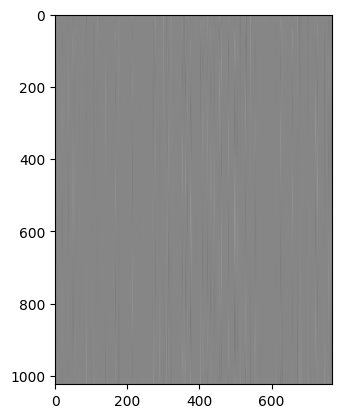

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(sd_hf["transformer.wpe.weight"], cmap='gray')
# 768 x 1024 positions

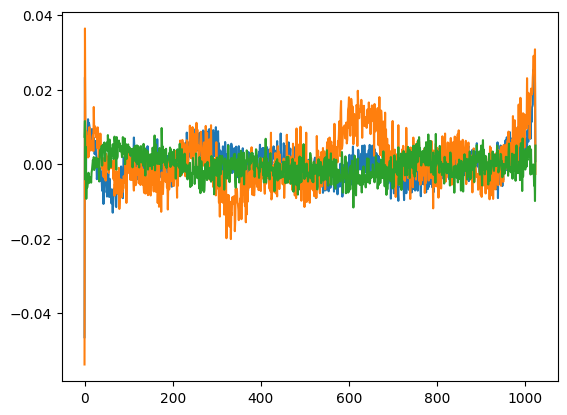

In [26]:
plt.plot(sd_hf["transformer.wpe.weight"][:,150])
plt.plot(sd_hf["transformer.wpe.weight"][:,200])
plt.plot(sd_hf["transformer.wpe.weight"][:,700])

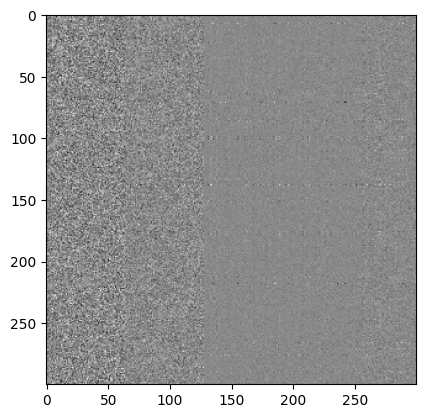

In [27]:
plt.imshow(sd_hf["transformer.h.1.attn.c_attn.weight"][:300,:300], cmap='gray')

In [31]:
with open("data/tinyshakespeare.txt", "r") as f:
    text = f.read()
data = text[:1000]
print(data[:100])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You


In [32]:
import tiktoken
enc = tiktoken.get_encoding('gpt2')
tokens = enc.encode(data)
print(tokens[:10])

[5962, 22307, 25, 198, 8421, 356, 5120, 597, 2252, 11]


In [47]:
import torch
buf = torch.tensor(tokens[:30 + 1])
print(buf)
x = buf.unsqueeze(0)
print(x)
x = buf[:-1].view(5,6)
y = buf[1:].view(5,6)
print(x)
print(y)


tensor([ 5962, 22307,    25,   198,  8421,   356,  5120,   597,  2252,    11,
         3285,   502,  2740,    13,   198,   198,  3237,    25,   198,  5248,
          461,    11,  2740,    13,   198,   198,  5962, 22307,    25,   198,
         1639])
tensor([[ 5962, 22307,    25,   198,  8421,   356,  5120,   597,  2252,    11,
          3285,   502,  2740,    13,   198,   198,  3237,    25,   198,  5248,
           461,    11,  2740,    13,   198,   198,  5962, 22307,    25,   198,
          1639]])
tensor([[ 5962, 22307,    25,   198,  8421,   356],
        [ 5120,   597,  2252,    11,  3285,   502],
        [ 2740,    13,   198,   198,  3237,    25],
        [  198,  5248,   461,    11,  2740,    13],
        [  198,   198,  5962, 22307,    25,   198]])
tensor([[22307,    25,   198,  8421,   356,  5120],
        [  597,  2252,    11,  3285,   502,  2740],
        [   13,   198,   198,  3237,    25,   198],
        [ 5248,   461,    11,  2740,    13,   198],
        [  198,  5962, 223

In [17]:
import numpy as np
np.log2(524288)

from datetime import datetime
print(datetime.now().strftime("%H:%M:%S"))

import time
print(time.strftime("%H:%M:%S", time.localtime()))


23:20:46
23:20:46


In [8]:
# Parse and visualize validation loss history
import numpy as np
import matplotlib.pyplot as plt

## GPT baselines
sz = "124M"

loss_baseline = {
    "124M": 3.2924,
}[sz]

hella2_baseline = { # HellaSwag for GPT-2
    "124M": 0.294463,
    "350M": 0.375224,
    "774M": 0.431986,
    "1558M": 0.488946,
}[sz]
hella3_baseline = { # HellaSwag for GPT-3
    "124M": 0.337,
    "350M": 0.436,
    "774M": 0.510,
    "1558M": 0.547,
}[sz]

# Load my model accuracy and loss history
with open("log/val_loss_history.txt", "r") as f:
    val_losses = [float(line.strip()) for line in f.readlines()]

with open("log/acc_history.txt", "r") as f:
    acc_history = [float(line.strip()) for line in f.readlines()]

with open("log/loss_history.txt", "r") as f:
    train_losses = [float(line.strip()) for line in f.readlines()]

# Convert to numpy array for easier manipulation
val_losses = np.array(val_losses)
acc_history = np.array(acc_history)
train_losses = np.array(train_losses)

x_train = np.arange(1, len(train_losses) + 1)
x_val = np.arange(1, len(val_losses) + 1)*75

# Create visualization
plt.figure(figsize=(12, 8))

# Main plot
plt.plot(x_val, val_losses, linewidth=2, label='Validation Loss', color = 'orange')
plt.plot(x_train, train_losses, linewidth=2, label='Training Loss', color='blue')
if loss_baseline is not None:
    plt.axhline(y=loss_baseline, color='r', linestyle='--', label=f"OpenAI GPT-2 ({sz}) checkpoint val loss")
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss Over Training Epochs')
plt.grid(True, alpha=0.3)
plt.legend()

# Print summary statistics
print(f"Training Summary:")
print(f"Total epochs: {len(val_losses)}")
print(f"Initial validation loss: {val_losses[0]:.6f}")
print(f"Final validation loss: {val_losses[-1]:.6f}")
print(f"Best validation loss: {np.min(val_losses):.6f} (epoch {np.argmin(val_losses) + 1})")
print(f"Total improvement: {val_losses[0] - val_losses[-1]:.6f}")
print(f"Improvement percentage: {((val_losses[0] - val_losses[-1]) / val_losses[0] * 100):.2f}%")

# Check for convergence
if len(val_losses) >= 10:
    recent_avg = np.mean(val_losses[-10:])
    print(f"Average loss over last 10 epochs: {recent_avg:.6f}")
    
    # Check if loss has plateaued (less than 0.1% improvement in last 10 epochs)
    if len(val_losses) >= 20:
        prev_avg = np.mean(val_losses[-20:-10])
        improvement_rate = (prev_avg - recent_avg) / prev_avg
        print(f"Improvement rate over last 10 epochs: {improvement_rate*100:.3f}%")
        if improvement_rate < 0.001:
            print("Model appears to have converged (very small improvement rate)") 

FileNotFoundError: [Errno 2] No such file or directory: 'log/val_loss_history.txt'